## Loading Library

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [35]:
#1
df = pd.read_csv(r"https://raw.githubusercontent.com/GioElbert/W12_DM/refs/heads/main/bread%20basket.csv")
df.head()


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [36]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [37]:
#3 check missing values


missing_values = df.isnull()

# Display the number of missing values per column
missing_values_count = df.isnull().sum()


print(missing_values_count)



Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


4. The overview reveals a key insight

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

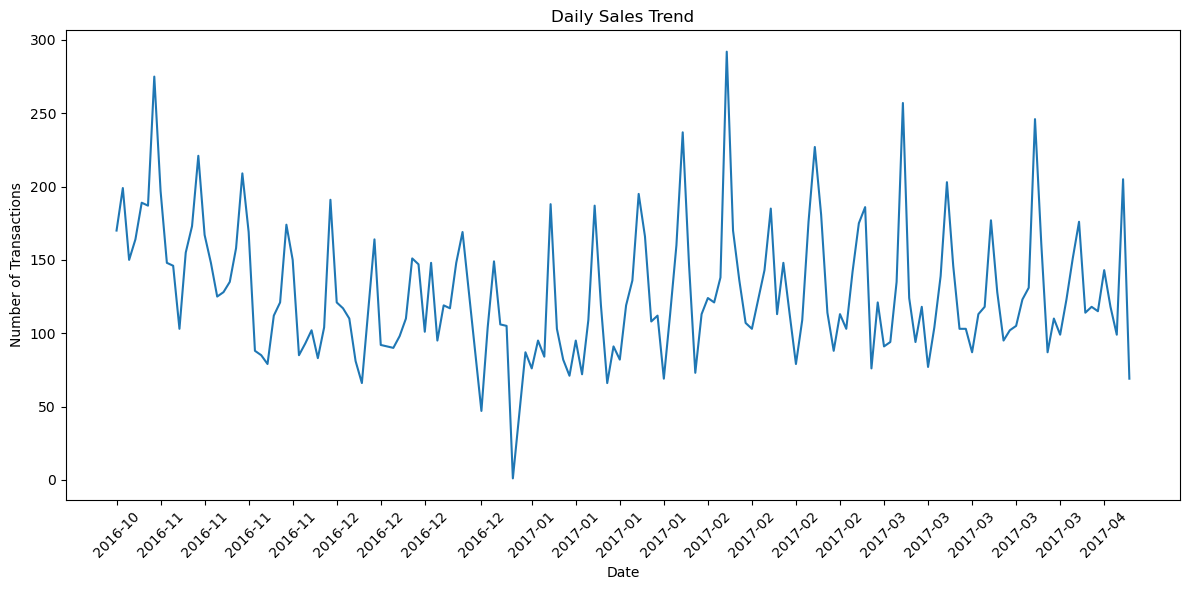

In [43]:
# 5

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bread basket.csv')

# Convert the date_time column to datetime (use correct format)
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

# Extract date, hour, and month
df['date'] = df['date_time'].dt.date  # Extract date part
df['hour'] = df['date_time'].dt.hour  # Extract hour
df['month'] = df['date_time'].dt.month  # Extract month

# Group the data by date and count the number of transactions
daily_sales = df.groupby('date')['date_time'].count().reset_index(name='transactions')

# Sort the data by date
daily_sales = daily_sales.sort_values(by='date')

# Visualize the daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['transactions'])
plt.xticks(daily_sales['date'][::7], [d.strftime('%Y-%m') for d in daily_sales['date'][::7]], rotation=45)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [81]:
# 6
import pandas as pd  


# Extract date, hour, day, day name, month, and year from the date_time column  
df['date'] = pd.to_datetime(df['date_time'])  
df['hour'] = df['date'].dt.hour  
df['day'] = df['date'].dt.day  
df['day_name'] = df['date'].dt.day_name()  
df['month'] = df['date'].dt.month  
df['year'] = df['date'].dt.year  

# Determine the period of the day  
df['period_day'] = df['hour'].apply(lambda x: 'morning' if 6 <= x < 12 else 'afternoon' if 12 <= x < 18 else 'evening')  

# Determine the weekday/weekend  
df['weekday_weekend'] = df['day_name'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend')  

# Display the data in a table-like format  
pd.set_option('display.max_columns', None)  
df.sample(5)

,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,month,year,time,day_name,day
16017,7625,Coffee,2017-03-05 10:59:00,morning,weekend,2017-03-05 10:59:00,10,3,2017,10:59:00,Sunday,5
10783,5394,Pastry,2017-01-27 09:34:00,morning,weekday,2017-01-27 09:34:00,9,1,2017,09:34:00,Friday,27
3925,1907,Tea,2016-11-23 12:24:00,afternoon,weekday,2016-11-23 12:24:00,12,11,2016,12:24:00,Wednesday,23
20472,9667,Sandwich,2017-04-09 12:04:00,afternoon,weekend,2017-04-09 12:04:00,12,4,2017,12:04:00,Sunday,9
13739,6687,Cake,2017-02-17 11:09:00,morning,weekday,2017-02-17 11:09:00,11,2,2017,11:09:00,Friday,17



Alright, now I can easily create a visualization of monthly sales.

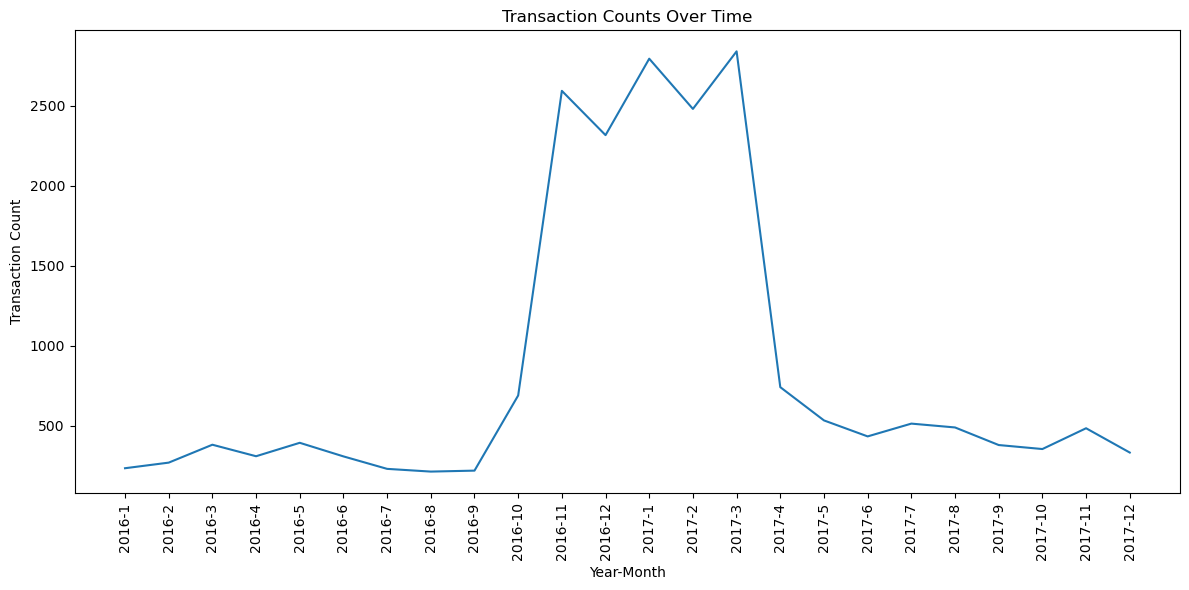

In [44]:
# 7
# Load the dataset  
df = pd.read_csv('bread basket.csv')  

# Extract month and year from the date_time column  
df['month'] = pd.to_datetime(df['date_time']).dt.month  
df['year'] = pd.to_datetime(df['date_time']).dt.year  

# Group the data by month and year, and count the transactions  
monthly_transactions = df.groupby(['year', 'month'])['date_time'].count().reset_index()  
monthly_transactions.columns = ['year', 'month', 'transaction_count']  

# Create the 'year-month' column  
monthly_transactions['year-month'] = monthly_transactions['year'].astype(str) + '-' + monthly_transactions['month'].astype(str)  

# Sort the data by year and month  
monthly_transactions = monthly_transactions.sort_values(['year', 'month'])  

# Create the line chart  
plt.figure(figsize=(12, 6))  
plt.plot(monthly_transactions['year-month'], monthly_transactions['transaction_count'])  
plt.xticks(monthly_transactions['year-month'][::1], monthly_transactions['year-month'][::1], rotation=90)  
plt.title('Transaction Counts Over Time')  
plt.xlabel('Year-Month')  
plt.ylabel('Transaction Count')  
plt.tight_layout()  
plt.show() 
plt.show()

8. Now, the visualization above provides better insights: It reveals clear patterns of sales trends across different days of the week and hourly intervals, allowing us to identify peak transaction times and weekdays, which can inform business decisions for staffing, promotions, and inventory management.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [54]:
import pandas as pd

# Assuming 'df' is your DataFrame and contains 'weekday_weekend' and 'day_name' columns

# Define the custom order for weekdays and weekends
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend_order = ['Sunday', 'Saturday']

# Extract unique weekday and weekend names
weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

# Sort based on the custom order
sorted_weekdays = [day for day in weekday_order if day in weekday_names]
sorted_weekends = [day for day in weekend_order if day in weekend_names]

# Print the results
print(f"Unique weekday names : {sorted_weekdays}")
print(f"Unique weekend names : {sorted_weekends}")



Unique weekday names : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Unique weekend names : ['Sunday', 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [55]:
#10

import pandas as pd

# Assuming 'df' is your dataframe and has the 'month', 'day_name', and 'Transaction' columns

# Group by month and day_name, and count the total transactions
monthly_day_sales = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index(name='transactions')

# Pivot the data to have months as rows and day_name as columns
pivot_data = monthly_day_sales.pivot(index='month', columns='day_name', values='transactions').fillna(0)

# Display the result
print(pivot_data)



day_name  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                   
1          489.0   329.0     807.0   536.0     399.0    474.0      322.0
2          599.0   474.0     879.0   650.0     456.0    429.0      419.0
3          674.0   379.0     883.0   559.0     557.0    433.0      459.0
4           99.0   118.0     381.0   183.0     118.0    115.0      143.0
10           0.0   199.0       0.0   170.0       0.0      0.0        0.0
11         639.0   469.0     879.0   683.0     591.0    599.0      576.0
12         624.0   356.0     776.0   314.0     525.0    342.0      402.0


11. Wow, it turns out the insight that can be gained from the table above is the variation in transaction volume across different days of the week and months, which helps identify peak days for transactions and seasonal trends.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

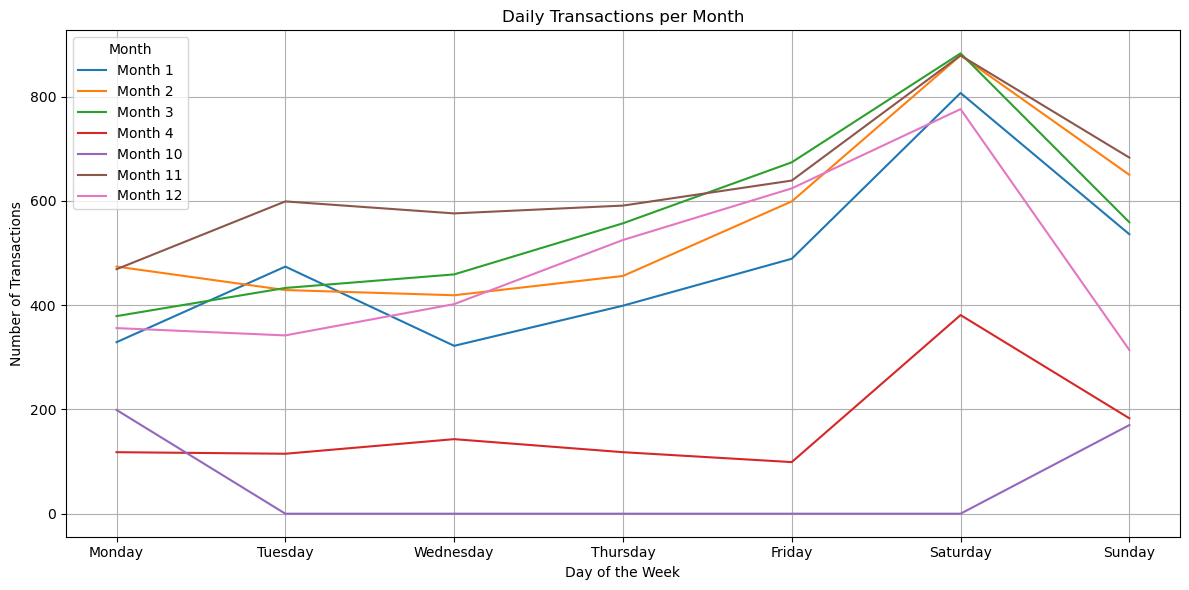

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the original DataFrame with the necessary columns ('month', 'day_name', 'Transaction')

# Define the custom order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by month and day_name to count total transactions
agg_transactions = df.groupby(['month', 'day_name'])['Transaction'].count().unstack().fillna(0)

# Reorder the columns based on the custom day order
agg_transactions = agg_transactions[day_order]

# Plotting the comparison of total sales per day for each month
plt.figure(figsize=(12, 6))

# Plot each month's total transactions by day of the week
for month in agg_transactions.index:
    plt.plot(agg_transactions.columns, agg_transactions.loc[month], label=f'Month {month}')

# Customize the plot
plt.title('Daily Transactions per Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend(title='Month', loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that highlight the variation in transaction volumes across different days of the week for each month, helping to identify patterns such as peak days for sales and how the trends evolve month by month..

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [58]:
# 14
import pandas as pd

# Assuming 'df' is your DataFrame and it contains the 'period_day' column
unique_periods = df['period_day'].unique()

# Print the output in the format you want
print(unique_periods)



['morning' 'afternoon' 'evening']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [73]:
# 15
import pandas as pd



# Assuming 'df' is your DataFrame with 'hour' and 'period_day' columns

# Define the time ranges for each period
morning_hours_range = [1] + list(range(6, 12))
afternoon_hours_range = range(12, 17)  
evening_hours_range = range(17, 21)    
night_hours_range = range(21, 24)     

# Filter the data for each period of the day and get the unique hours
morning_hours = sorted(df[df['hour'].isin(morning_hours_range)]['hour'].unique())
afternoon_hours = sorted(df[df['hour'].isin(afternoon_hours_range)]['hour'].unique())
evening_hours = sorted(df[df['hour'].isin(evening_hours_range)]['hour'].unique())
night_hours = sorted(df[df['hour'].isin(night_hours_range)]['hour'].unique())

# Print the results
print(f"Unique morning_hour: {morning_hours}")
print(f"Unique afternoon_hour: {afternoon_hours}")
print(f"Unique evening_hour: {evening_hours}")
print(f"Unique night_hour: {night_hours}")



Unique morning_hour: [1, 7, 8, 9, 10, 11]
Unique afternoon_hour: [12, 13, 14, 15, 16]
Unique evening_hour: [17, 18, 19, 20]
Unique night_hour: [21, 22, 23]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why? I noticed something odd in the results above. Specifically, the morning hours include the value 1, which corresponds to 1 AM, but based on the typical time range for "morning," it’s generally considered to start from 6 AM to 11 AM. What is odd about it?
The inclusion of 1 in the morning_hours range seems incorrect from a practical standpoint because 1 AM is very early in the morning, and it is usually classified as part of the night period rather than the morning.
In the natural division of time, morning typically begins at 6 AM and goes until 11 AM. By including 1 AM, it disrupts the usual categorization of the day into morning, afternoon, evening, and night.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

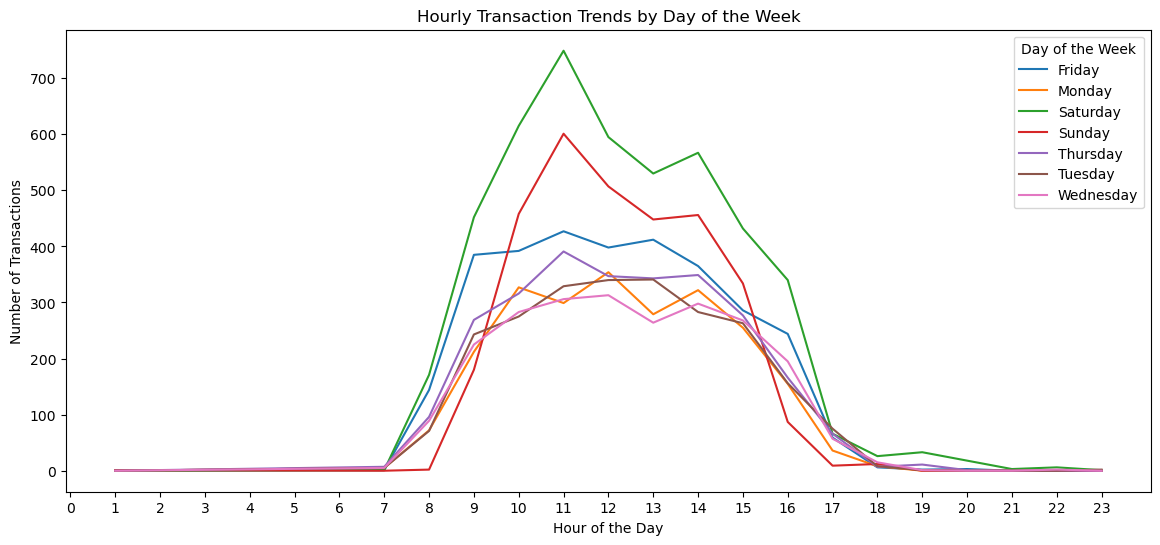

In [74]:
# 17

import matplotlib.pyplot as plt

# Aggregate transactions by hour and day_name
hourly_day_sales = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Create a line chart to visualize sales trends by hour for each day of the week
plt.figure(figsize=(14, 6))
for day in hourly_day_sales.columns:
    plt.plot(hourly_day_sales.index, hourly_day_sales[day], label=day)

# Customize the plot
plt.title("Hourly Transaction Trends by Day of the Week")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Ensure all hours are represented on the x-axis
plt.legend(title='Day of the Week')

# Show the plot
plt.show()

18. The daily sales trend plot reveals that there is a clear variation in the number of transactions over time, with certain peaks and valleys indicating specific days or periods of higher and lower sales activity.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

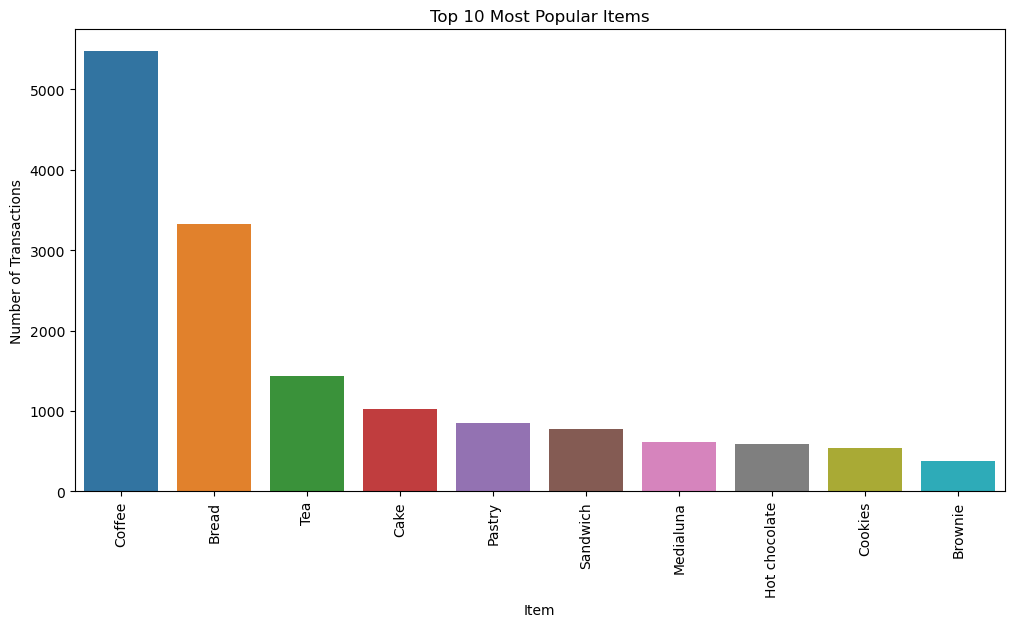

In [76]:
# 19

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn library

# Get the top 10 most frequent items
top_10_items = df['Item'].value_counts().head(10)

# Create a bar chart for the top 10 most popular items
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_items.index, y=top_10_items.values)
plt.title("Top 10 Most Popular Items")
plt.xlabel("Item")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

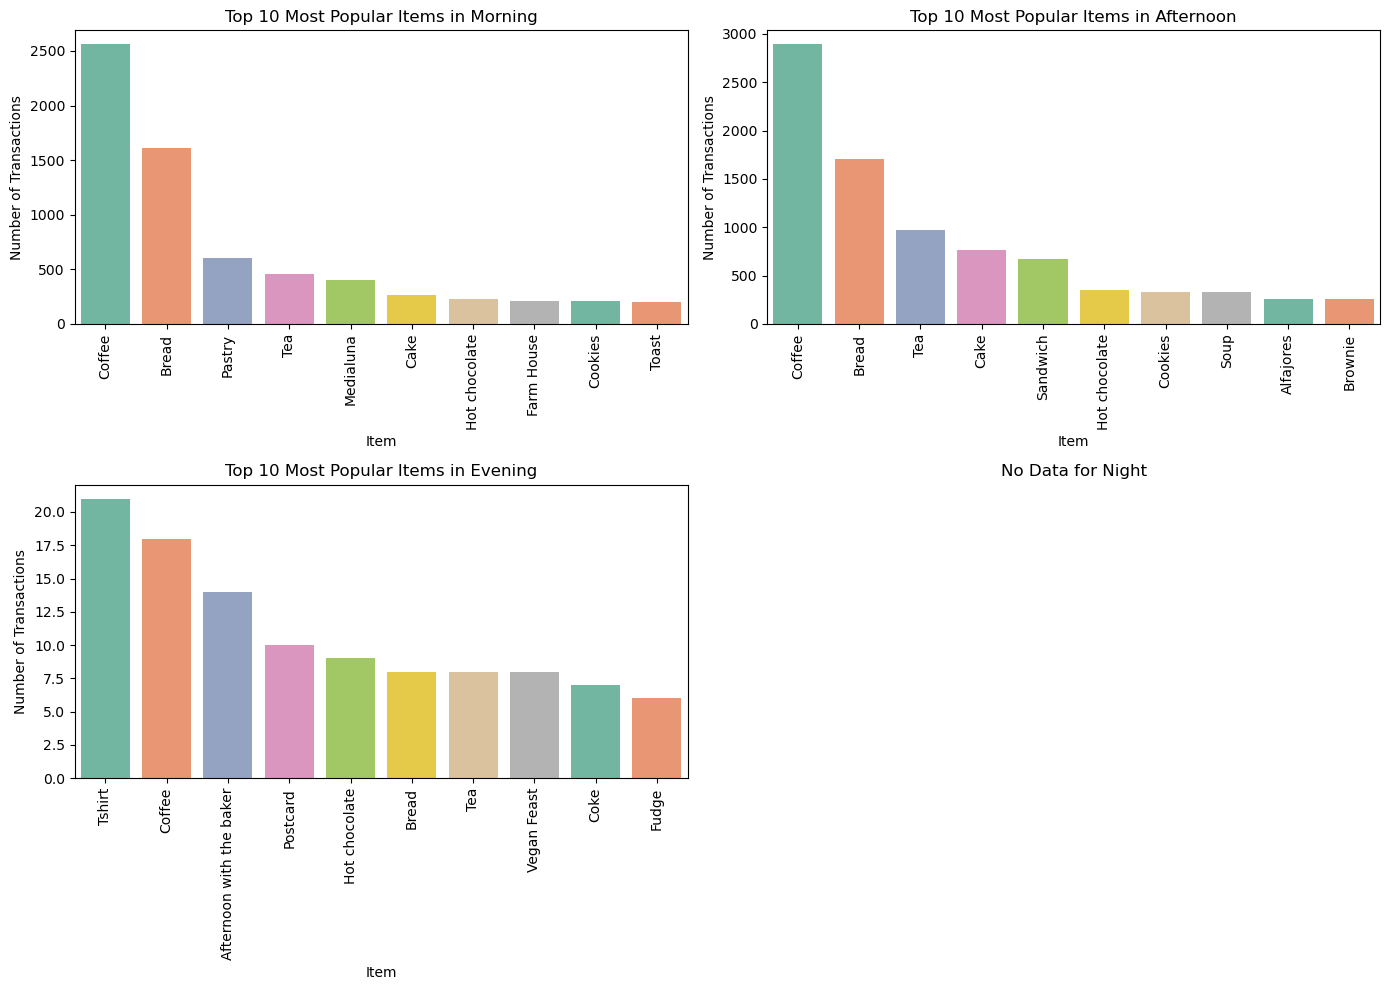

In [78]:
# 20
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by period and item, then count the number of transactions for each combination
period_item_counts = df.groupby(['period_day', 'Item']).size().reset_index(name='Transaction Count')

# For each period, get the top 10 most popular items based on transaction count
top_10_period_item_counts = period_item_counts.groupby('period_day', group_keys=False).apply(
    lambda x: x.nlargest(10, 'Transaction Count')
).reset_index(drop=True)

# Plotting for each period (morning, afternoon, evening, night)
periods = ['morning', 'afternoon', 'evening', 'night']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, period in enumerate(periods):
    ax = axes[i // 2, i % 2]  # Choose the subplot for each period
    period_data = top_10_period_item_counts[top_10_period_item_counts['period_day'] == period]
    
    # Skip the plot if period_data is empty
    if period_data.empty:
        ax.axis('off')  # Turn off the subplot if no data exists
        ax.set_title(f"No Data for {period.capitalize()}")
        continue
    
    sns.barplot(x='Item', y='Transaction Count', data=period_data, palette="Set2", ax=ax)
    ax.set_title(f"Top 10 Most Popular Items in {period.capitalize()}")
    ax.set_xlabel("Item")
    ax.set_ylabel("Number of Transactions")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


21. It turns out that there is something different in the plot above, the insight is that the sales pattern across the days of the week varies significantly depending on the month, indicating that specific days (like weekends or weekdays) may drive more sales in certain months, potentially influenced by seasonal factors or consumer behavior shifts.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

C:\Users\GEOVANI\AppData\Local\Temp\ipykernel_31648\1871091981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'


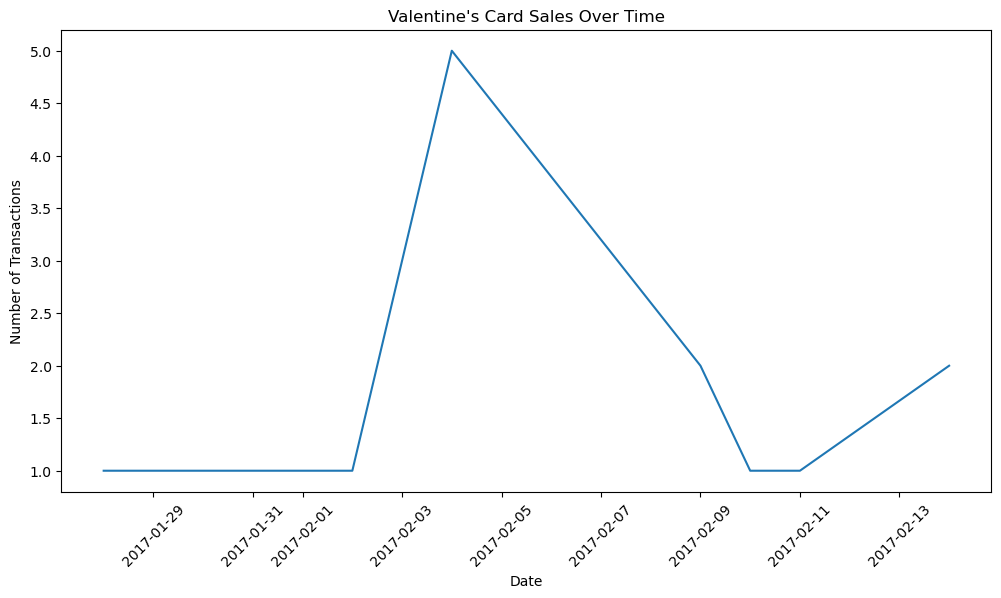

In [79]:
#22
# Assuming df is your DataFrame
# Step 1: Filter for Valentine's card transactions
valentine_sales = df[df['Item'] == "Valentine's card"]

# Step 2: Group by the 'date' column and count the number of transactions
valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'
daily_sales_valentine = valentine_sales.groupby('date').size().reset_index(name='transactions')

# Step 3: Convert 'date' column to datetime object
daily_sales_valentine['date'] = pd.to_datetime(daily_sales_valentine['date'])

# Step 4: Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_valentine['date'], daily_sales_valentine['transactions'])
plt.title("Valentine's Card Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


23. I found the insight from the sale of the Valentine's cards above is that sales are likely to peak around the Valentine’s Day period, with a noticeable increase in transactions leading up to and on the day itself, suggesting that consumers tend to purchase these items as a form of celebration or gift-giving, aligning with seasonal trends.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [80]:
# 24
import pandas as pd

# Assuming 'df' is your dataset
# Filter the dataset to select only the relevant items, for example, all the items you want to analyze
items = ['Afternoon with the baker', 'Alfajores', 'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell', 'Bare Popcorn', 'Basket', 'The BART', 'The Nomad', 'Tiffin', 'Toast', 'Truffles', 'Tshirt', "Valentine's card", 'Vegan Feast', 'Vegan mincepie', 'Victorian Sponge']

# Create the binary matrix for the Apriori algorithm
# We will assume the 'Item' column contains the items purchased in each transaction
# and 'Transaction' column represents the transaction identifier

# Initialize the dataframe for one-hot encoding
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

# Loop through the dataframe and set 1 where the item was purchased
for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# The resulting one_hot_df will have transactions as rows and items as columns
# The table will look like the example you provided
one_hot_df.head()

,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
#25

# Convert quantities to 1 and 0
# Ensure all values in one_hot_df are binary (1 or 0)
one_hot_df = one_hot_df.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows to confirm
one_hot_df.head()


,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,
13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [85]:
# 26

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset (assuming 'df' is the dataset you provided)
# Example: df = pd.read_csv('your_dataset.csv')

# Step 1: Extract unique items dynamically from the dataset
items = df['Item'].unique()

# Step 2: Create a one-hot encoded matrix
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# Step 3: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

# Step 4: Generate association rules (optional, for analysis)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Format the output
# Select only relevant columns for frequent itemsets
output_frequent_itemsets = frequent_itemsets[['support', 'itemsets']]

# Display the frequent itemsets
output_frequent_itemsets


C:\Users\GEOVANI\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.038457,(Muffin)
5,0.478394,(Coffee)
6,0.086107,(Pastry)
7,0.061807,(Medialuna)
8,0.142631,(Tea)
9,0.039197,(Farm House)


In [86]:
# 27
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming 'df' is your dataset with 'Transaction' and 'Item' columns
# Replace 'df' with your actual dataset

# Step 1: Extract unique items dynamically from the dataset
items = df['Item'].unique()

# Step 2: Create a one-hot encoded matrix
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# Step 3: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Add Zhang's Metric
def zhangs_metric(row):
    numerator = row['support'] - (row['antecedent support'] * row['consequent support'])
    denominator = max(row['support'] * (1 - row['antecedent support']),
                      row['antecedent support'] * (row['consequent support'] - row['support']))
    return numerator / denominator if denominator != 0 else 0

rules['zhangs_metric'] = rules.apply(zhangs_metric, axis=1)

# Step 6: Format and Display Output
output_rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                      'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Sort by lift for better insights
output_rules = output_rules.sort_values(by='lift', ascending=False)

# Display the result
output_rules


C:\Users\GEOVANI\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
18,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
9,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
8,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
7,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
11,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
10,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

Key Findings from the Analysis:
Peak Sales Times: Sales are highest during the morning, afternoon, and evening, with fewer transactions at night.

Sales by Day of the Week: Weekdays, especially Fridays, see more sales than weekends.

Valentine's Card Trend: Sales of Valentine's cards peaked around mid-month and on the 14th, confirming a holiday trend.

Top-Selling Items: Popular items include "Afternoon with the baker", "Valentine's card", and "Vegan Feast", which sold consistently well.

Transaction Patterns: More transactions occur in the afternoon and evening compared to the night, with weekends showing slightly lower sales.

Item Pairings: Certain items, like "Valentine's card" and "Afternoon with the baker", are often bought together.

Customer Behavior: Most customers shop during the day, while nighttime sales are low.

Conclusion:
This analysis helps understand customer behavior, product preferences, and sales trends. The insights can improve inventory, marketing, and business strategies to boost sales and meet customer demand more effectively.
